In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# **Explorando el modelo**

---



In [0]:
fashion_mnist = keras.datasets.fashion_mnist # Dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Datos del dataset

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [62]:
train_images.shape # 60,000 imgs para train

(60000, 28, 28)

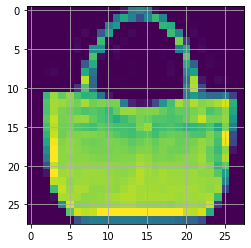

In [63]:
plt.imshow(train_images[100])
plt.grid(True)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

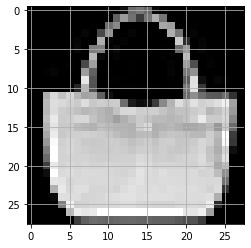

In [65]:
plt.imshow(train_images[100], cmap='gray') # cmap='gray' para escala de grises
plt.grid(True)

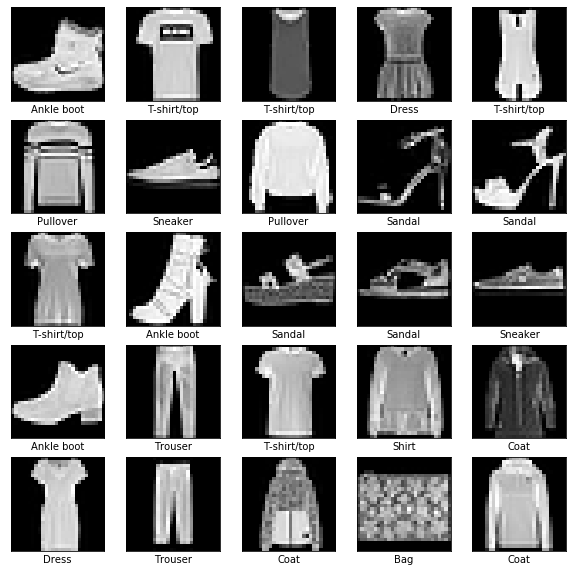

In [66]:
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(train_images[i], cmap='gray')

  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.xlabel(class_names[train_labels[i]])

# **Creación y evaluación del modelo**

---



In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.4959 - acc: 0.8259
Epoch 2/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3713 - acc: 0.8666
Epoch 3/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3342 - acc: 0.8789
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3112 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2914 - acc: 0.8930


In [70]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3647 - acc: 0.8675
Accuracy: 0.8675


# **Uso del modelo**

---



In [0]:
predictions = model.predict(test_images)

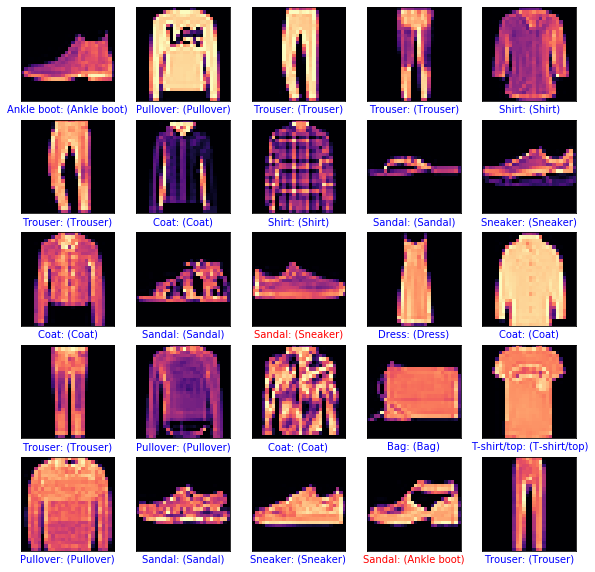

In [97]:
plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.imshow(test_images[i], cmap=plt.cm.magma)

  plt.xticks([])
  plt.yticks([])

  label_predicted = class_names[np.argmax(predictions[i])]
  label_true = class_names[test_labels[i]]

  if label_predicted == label_true:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel(f'{label_predicted}: ({label_true})', c=color)